# Task 1, 3 - fastai interface to ingest models from pytorch model zoo

In [1]:
# Run once per session
# !pip install fastai -q --upgrade

In [2]:
from fastai.vision.all import *
from challenge.functions import *

## 1.1 - Set data loading params

In [3]:
path = untar_data(URLs.PETS)/'images'
fnames = get_image_files(path)
pat = r'/([^/]+)_\d+.*'

In [4]:
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
bs=64

In [5]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [6]:
dls = pets.dataloaders(path, path=path, bs=bs)

In [7]:
dls.path

Path('/home/hud/.fastai/data/oxford-iiit-pet/images')

In [8]:
dls.c # number of categories

37

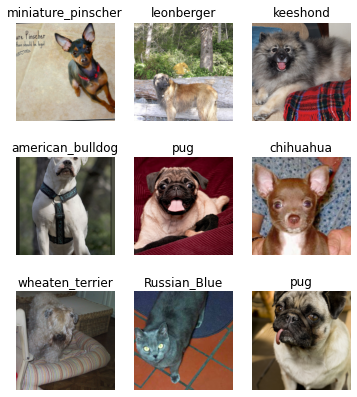

In [9]:
dls.show_batch(max_n=9, figsize=(6,7))

## 1.2 - Initialize learner model

In [10]:
learn = cnn_learner(dls, resnet18) # using fastai built-in model

Notice the learner model only works with head and body parts:

In [11]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

We can see that our fastai model was split into two different layer groups:

    Group 1: Our encoder, which is everything but the last layer of our original model
    Group 2: Our head, which is a fastai version of a Linear layer plus a few extra bits



## 1.3 - Get pretrained model

In [12]:
# Run once
# !pip install timm

In [13]:
from timm import create_model

In [14]:
import timm
from pprint import pprint
model_names = timm.list_models(pretrained=True)
pprint(model_names)

['adv_inception_v3',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn107',
 'dpn131',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnetlight',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b3a',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_lite0',
 'ens_adv_inception_resnet_v2',
 'ese_vovnet19b_dw',
 'ese_vovnet39b',
 'fbnetc_100',
 'gluon_inception_v3',
 'gluon_resnet18_v1b',
 'gluon_resnet34_v1b',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'gluon_resn

In [15]:
net = create_model('resnet18', pretrained=True) #load pretrained models elsewhere

In [16]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
                          1.7083e-02, -1.2694e-02],
                        [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
                         -1.2907e-01,  3.7424e-03],
                        [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
                          2.5632e-01,  6.3573e-02],
                        ...,
                        [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
                         -4.2058e-01, -2.5781e-01],
                        [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
                          3.9359e-01,  1.6606e-01],
                        [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
                         -8.2230e-02, -5.7828e-03]],
              
                       [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
                          6.6221

The model from pytorch only has the head, not the body. Learner interface needs both head and body. 

In [17]:
body = create_timm_body('resnet18',pretrained=True)
body

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU

In [18]:
nf = num_features_model(nn.Sequential(*body.children())) * (2); nf

1024

In [19]:
head = create_head(nf, dls.c)
head

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=37, bias=False)
)

In [20]:
model = nn.Sequential(body, head) # fastai Learner needs body and head

In [21]:
apply_init(model[1], nn.init.kaiming_normal_)

In [22]:
len(model) # Now we have head and body

2

Great! Now we have both the body commonly received from pretrained model zoos, as well as the head for fastai use. Fastai already allows comfortable imports of these pretrained architectures, in case we have other models we want to use, we can edit them through this way.

In [23]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy())

In [24]:
learn.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d       

The new model is not frozen, we need to split the model to model[0] (head) and model[1] body - we `use default_split` for this purpose:

In [25]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), 
                splitter=default_split, metrics=error_rate,
               path=path)

In [26]:
learn.freeze()
learn.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d       

Now we find the optimal learning rate, which is roughly at the steepest slope:

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.00363078061491251)

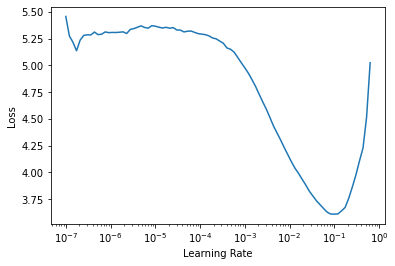

In [27]:
learn.lr_find()

In [28]:
learn.fit_one_cycle(5, slice(3e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.849310,1.807907,0.232070,00:48
1,1.399855,1.150161,0.143437,00:47
2,1.153755,1.067368,0.119080,00:48
3,1.025415,1.002675,0.093369,00:49
4,0.961447,0.999453,0.090663,00:49


We can use fastai learner to save at the path:

In [29]:
learn.save('cat-1')

Path('/home/hud/.fastai/data/oxford-iiit-pet/images/models/cat-1.pth')

## 1.4 - Convert fastai pytorch to ONNX

ONNX is a special module, where we can potentially speed up inference by relying on C++ rather than Python. We export the fastai model to onnx.

In [30]:
learn.model.eval();
torch.onnx.export(
    learn.model,
    torch.randn(1, 3, 224, 224).cuda(),
    path/"models/pet-breed.onnx",
    input_names=["image"],
    output_names=["breeds"]
)

# Task 5 - Use model-agnostic ONNX runtime for classification

In [31]:
import onnxruntime as rt

In [32]:
sess = rt.InferenceSession("/home/hud/.fastai/data/oxford-iiit-pet/images/models/pet-breed.onnx")

In [33]:
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
input_name, label_name

('image', 'breeds')

In [34]:
# run once
!wget https://raw.githubusercontent.com/onnx/onnx-docker/master/onnx-ecosystem/inference_demos/images/dog.jpg

--2020-12-18 07:45:42--  https://raw.githubusercontent.com/onnx/onnx-docker/master/onnx-ecosystem/inference_demos/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.68.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.68.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21240 (21K) [image/jpeg]
Saving to: ‘dog.jpg.2’

dog.jpg.2           100%[===================>]  20.74K  --.-KB/s    in 0.01s   

2020-12-18 07:45:43 (1.75 MB/s) - ‘dog.jpg.2’ saved [21240/21240]



Image size:  (224, 224)


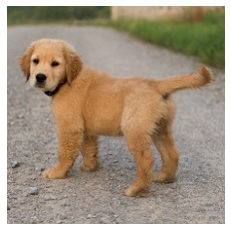

In [35]:
image = PILImage.create(f'dog.jpg')

print("Image size: ", image.size)
plt.axis('off')
display_image = plt.imshow(image)
image_data = np.array(image).transpose(2, 0, 1)
input_data = preprocess(image_data)

In [36]:
start = time.time()
raw_result = sess.run([label_name], {input_name: input_data})
end = time.time()
res = postprocess(raw_result)

Final top prediction is: great_pyrenees
Inference time: 368.33 ms
============ Top 5 labels are: ============================
['great_pyrenees', 'english_cocker_spaniel', 'wheaten_terrier', 'beagle', 'american_pit_bull_terrier']


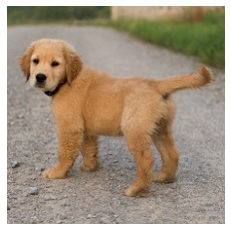

In [37]:
inference_time = np.round((end - start) * 1000, 2)
idx = np.argmax(res)

print('========================================')
print('Final top prediction is: ' + dls.vocab[idx])
print('========================================')

print('========================================')
print('Inference time: ' + str(inference_time) + " ms")
print('========================================')

sort_idx = np.flip(np.squeeze(np.argsort(res)))
print('============ Top 5 labels are: ============================')
print(dls.vocab[sort_idx[:5]])
print('===========================================================')

plt.axis('off')
display_image = plt.imshow(image)

Let's see how that compares with fastai inference

In [38]:
start = time.time()
fastai_res = learn.predict(image, with_input=False)
end = time.time()
inference_time = np.round((end - start) * 1000, 2)
print('Inference time: ' + str(inference_time) + " ms")
fastai_res

Inference time: 38.69 ms


('great_pyrenees',
 tensor(21),
 tensor([0.0187, 0.0139, 0.0044, 0.0145, 0.0281, 0.0165, 0.0024, 0.0067, 0.0023,
         0.0077, 0.0058, 0.0035, 0.0015, 0.0475, 0.0184, 0.1133, 0.0018, 0.0201,
         0.1431, 0.0092, 0.0158, 0.2277, 0.0158, 0.0183, 0.0026, 0.0183, 0.0524,
         0.0193, 0.0312, 0.0256, 0.0074, 0.0036, 0.0014, 0.0097, 0.0042, 0.0519,
         0.0152]))

Great ! ONNX-runtime classifies the one of the top 5 dog breed but beats the fastai inference by about 15 ms!

## ONNX-tensorflow for deployment

In [39]:
import onnx
from onnx_tf.backend import prepare
import warnings
warnings.filterwarnings('ignore')

# Load the ONNX file
model = onnx.load("/home/hud/.fastai/data/oxford-iiit-pet/images/models/pet-breed.onnx")

# Import the ONNX model to Tensorflow
tf_rep = prepare(model)

# Export Tensorflow model
tf_rep.export_graph(path/'models/pet-breed.pb')

output = tf_rep.run(np.asarray(input_data, dtype=np.float32)[:, :])
print('The dog is classified as ',dls.vocab[np.argmax(output)])




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/home/hud/.virtualenvs/challenge/lib/python3.6/site-packages/onnx_tf/common/__init__.py:107: UserWarning: onnx_tf.common.get_outputs_names is deprecated. It will be removed in future release. Use TensorflowGraph.get_outputs_names instead.
  warnings.warn(message)












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


The dog is classified as  great_pyrenees


Super! Now we have shown pytorch-based fastai->ONNX->tensorflow conversions with similar inferences. Let's move on to further analysis.

# Task 2 - Further analysis

## 2.1 - Functionality

In [40]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.load('cat-1');

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

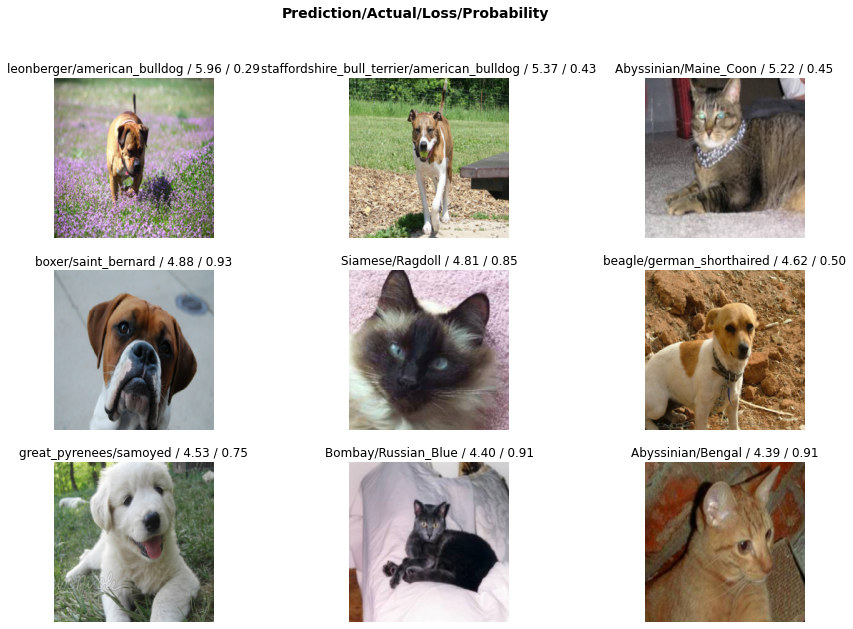

In [42]:
interp.plot_top_losses(9, figsize=(15,10))

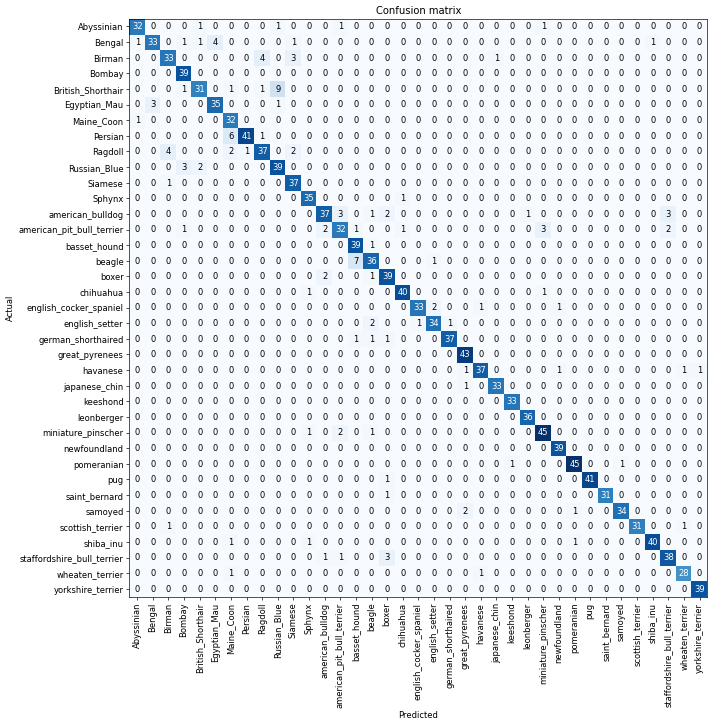

In [43]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [44]:
interp.most_confused(min_val=3)

[('British_Shorthair', 'Russian_Blue', 9),
 ('beagle', 'basset_hound', 7),
 ('Persian', 'Maine_Coon', 6),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Birman', 'Ragdoll', 4),
 ('Ragdoll', 'Birman', 4),
 ('Birman', 'Siamese', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Russian_Blue', 'Bombay', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'miniature_pinscher', 3),
 ('staffordshire_bull_terrier', 'boxer', 3)]

## 2.2 - Comprehensibility

We want to see what the model sees to identify whether something is a cat or a dog - here we look at the cat instance.

In [45]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=21,
    label_func=is_cat, item_tfms=Resize(224))
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.141595,0.029619,0.008119,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.056977,0.020142,0.004736,01:33


In [46]:
learn.save('cam-1')

Path('/home/hud/.fastai/data/oxford-iiit-pet/images/models/cam-1.pth')

In [47]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=21,
    label_func=is_cat, item_tfms=Resize(224))
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.model.cuda()
learn.load('cam-1');

In [48]:
!wget https://www.mynorthridgevet.com/imagebank/eVetSites/DogCats/052016_EVS_CatDog5.jpg

--2020-12-18 07:48:51--  https://www.mynorthridgevet.com/imagebank/eVetSites/DogCats/052016_EVS_CatDog5.jpg
Resolving www.mynorthridgevet.com (www.mynorthridgevet.com)... 67.159.202.100
Connecting to www.mynorthridgevet.com (www.mynorthridgevet.com)|67.159.202.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17211 (17K) [image/jpeg]
Saving to: ‘052016_EVS_CatDog5.jpg’

052016_EVS_CatDog5. 100%[===================>]  16.81K  --.-KB/s    in 0s      

2020-12-18 07:48:51 (149 MB/s) - ‘052016_EVS_CatDog5.jpg’ saved [17211/17211]



In [49]:
img = PILImage.create(f'052016_EVS_CatDog5.jpg')
x, = first(dls.test_dl([img]))

In [50]:
class Hook():
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)   
    def hook_func(self, m, i, o): self.stored = o.detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [51]:
with Hook(learn.model[0]) as hook:
    with torch.no_grad(): output = learn.model.eval()(x.cuda())
    act = hook.stored

In [52]:
class HookBwd():
    def __init__(self, m):
        self.hook = m.register_backward_hook(self.hook_func)   
    def hook_func(self, m, gi, go): self.stored = go[0].detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [53]:
cls = 1
with HookBwd(learn.model[0]) as hookg: # average of all layers
    with Hook(learn.model[0]) as hook:
        output = learn.model.eval()(x.cuda())
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

In [54]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = (w * act[0]).sum(0)

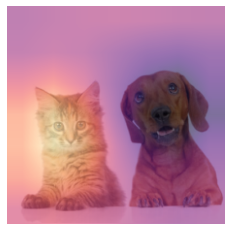

In [55]:
_,ax = plt.subplots()
x_dec = TensorImage(dls.train.decode((x,))[0][0])
x_dec.show(ctx=ax)
ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

The novelty with Grad-CAM is that we can use it on any layer. For example, here we use it on the output of the second-to-last ResNet group:

In [56]:
with HookBwd(learn.model[0][-2]) as hookg: # 
    with Hook(learn.model[0][-2]) as hook:
        output = learn.model.eval()(x.cuda())
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

In [57]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = (w * act[0]).sum(0)

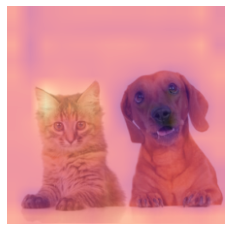

In [58]:
_,ax = plt.subplots()
x_dec.show(ctx=ax)
ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');